<a href="https://colab.research.google.com/github/tugbaygc/Aygaz_Python_Bootcamp/blob/main/notebookacdbfaf4f8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'nasa-nearest-earth-objects-1910-2024:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5410371%2F8984243%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240919%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240919T144538Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D35000e8f521f06549e205425cbaf1bcd8e69a081bcfa81073b7a91aad33c2371722081d845a698a5ab6f163b4380ad62b97bfba848d945aa5e8d4eba203098a92d98cc0cb9b1ef26937b9388b0969f843b7d097da625db66b9e3d2f2391762a89d7c3c449134ee2b5b66d0e76489bf92cfc63c0494cf5d13db6856884e1ffef74eb27d8b57fd2bf244f6ef07f12797d9d1dd70eab7a1007e8d2f2576afcca93a9c6cd67eedc97b1ae9733ad4219dc5b70135f7ba8fdb78acc6941bd46127ca103aa0f3b0e3879a32fa2ab391d1d47585df2afc034a4af2fdf86af6c30c846838929547b90eaa0ce073db25c858d72da6dad3b03e95436ae83bd3440e4170d375'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 13657427 bytes downloaded
Downloaded and uncompressed: nasa-nearest-earth-objects-1910-2024
Data source import complete.


In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as pd # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-nearest-earth-objects-1910-2024/nearest-earth-objects(1910-2024).csv


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('/kaggle/input/nasa-nearest-earth-objects-1910-2024/nearest-earth-objects(1910-2024).csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [17]:
df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [18]:
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


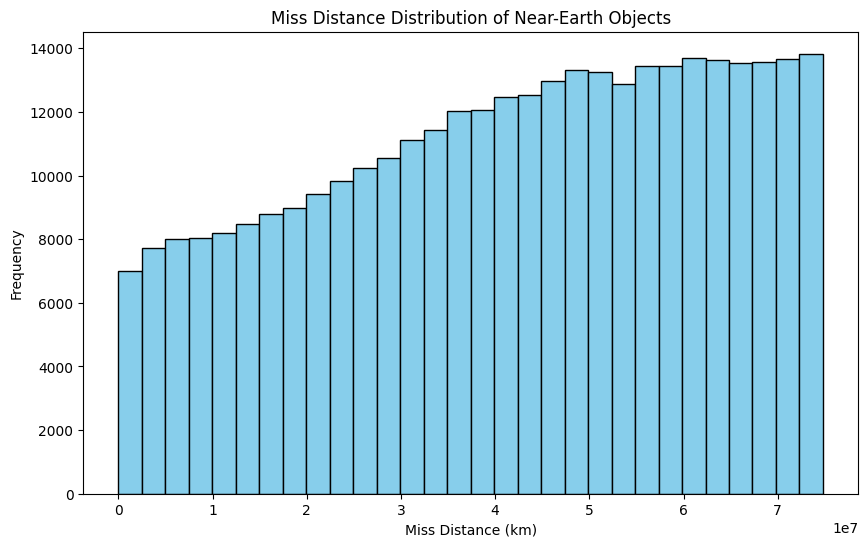

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(df['miss_distance'], bins=30, color='skyblue', edgecolor='black')
plt.title('Miss Distance Distribution of Near-Earth Objects')
plt.xlabel('Miss Distance (km)')
plt.ylabel('Frequency')
plt.show()

In [20]:
nearest_objects = df.nsmallest(10, 'miss_distance')
print(nearest_objects[['name', 'miss_distance']])


                name  miss_distance
311949    (2020 VT4)    6745.532516
337757    (2024 LH1)    8098.256296
309768     (2020 QG)    9316.925424
318864    (2021 UA1)    9426.685381
327999     (2023 BU)    9966.973049
331394     (2023 RS)   10361.043758
277775    (2011 CQ1)   11851.666854
271398   (2008 TS26)   12638.162696
257710  (2004 FU162)   12913.138541
307584     (2020 JJ)   13403.654996


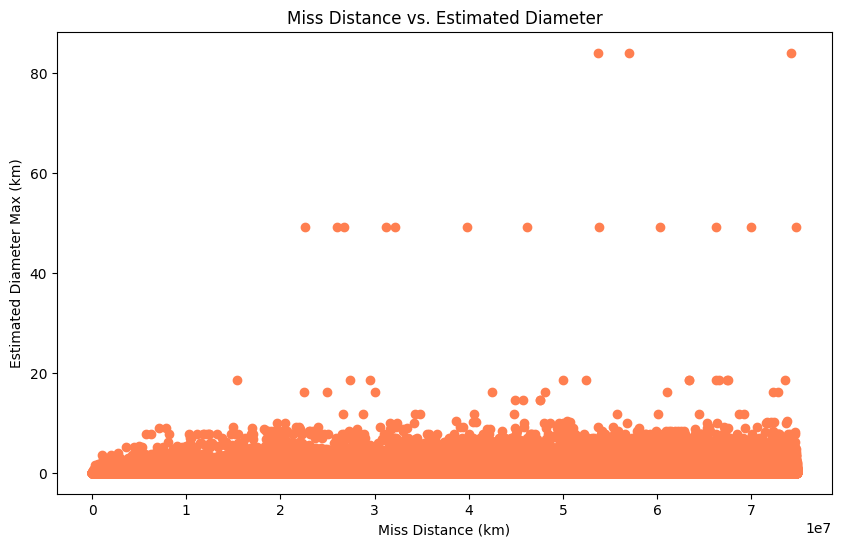

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(df['miss_distance'], df['estimated_diameter_max'], color='coral')
plt.title('Miss Distance vs. Estimated Diameter')
plt.xlabel('Miss Distance (km)')
plt.ylabel('Estimated Diameter Max (km)')
plt.show()


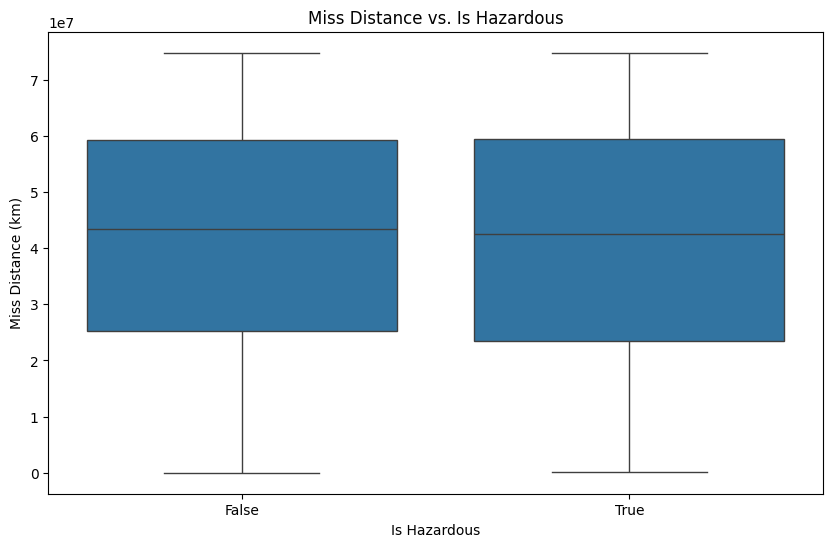

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_hazardous', y='miss_distance', data=df)
plt.title('Miss Distance vs. Is Hazardous')
plt.xlabel('Is Hazardous')
plt.ylabel('Miss Distance (km)')
plt.show()


In [23]:
# Eksik verileri temizleme (eğer varsa)
df = df.dropna()

# Gerekli kütüphaneleri yükleme
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
# Gök cisimlerinin Dünya için tehlikeli olup olmadığını anlama
# Özellikler ve hedef değişkeni seçme
X = df[['relative_velocity', 'miss_distance', 'estimated_diameter_min', 'estimated_diameter_max']]
y = df['is_hazardous']

In [25]:
# Veriyi %80 eğitim, %20 test seti olacak şekilde bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Lojistik regresyon modelini oluşturup ve eğitme
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [27]:
# Test seti ile tahmin yapma
y_pred = model.predict(X_test)

# Doğruluk oranı
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk oranı: {accuracy:.2f}")

# Karışıklık matrisi ve sınıflandırma raporu
conf_matrix = confusion_matrix(y_test, y_pred)
print("Karışıklık Matrisi:\n", conf_matrix)

classification_rep = classification_report(y_test, y_pred)
print("Sınıflandırma Raporu:\n", classification_rep)

Doğruluk oranı: 0.87
Karışıklık Matrisi:
 [[59088     0]
 [ 8547     0]]
Sınıflandırma Raporu:
               precision    recall  f1-score   support

       False       0.87      1.00      0.93     59088
        True       0.00      0.00      0.00      8547

    accuracy                           0.87     67635
   macro avg       0.44      0.50      0.47     67635
weighted avg       0.76      0.87      0.81     67635



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


bu sonuç modelin yalnızca "tehlikeli olmayan" (False) sınıfı iyi tahmin ettiğini, ancak "tehlikeli" (True) sınıfını hiç tahmin edemediğini gösteriyor.

Sorun Analizi:
  Doğruluk oranı (Accuracy: 0.87): Model, genel doğruluk açısından oldukça iyi görünüyor. Ancak bu yanıltıcı olabilir çünkü veri setindeki dengesizlik nedeniyle tehlikeli olmayan nesneleri tahmin etmek daha kolay.
  Karışıklık Matrisi:
[59088, 0]: Model 59,088 adet tehlikeli olmayan gök cismini doğru tahmin etti (True Negatives).
[8547, 0]: Model hiçbir tehlikeli gök cismini doğru tahmin edemedi (False Negatives), yani model, tehlikeli olan nesneleri "tehlikeli değil" olarak sınıflandırdı.
  Sınıflandırma Raporu:
  
Precision, Recall, F1-score: Tehlikeli nesneler için (True sınıfı) bu metrikler 0.00 olarak görünüyor, çünkü model bu sınıf için hiç tahmin yapamadı.

Bu sonuçlar, veri setinde dengesizlik olduğunu gösteriyor. Yani, tehlikeli (True) olan nesneler veri setinde çok az bulunuyor olabilir, bu da modelin sadece tehlikeli olmayan sınıfa odaklanmasına neden olmuş.

In [28]:
print(df['is_hazardous'].value_counts())

is_hazardous
False    295009
True      43162
Name: count, dtype: int64


In [29]:
# Veri Dengesizliğini Çözmek İçin Aşağıdaki Yöntemlerden Biri Olan SMOTE kullanımı

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [30]:
# Lojistik regresyon modelini yeniden eğitme
model = LogisticRegression()
model.fit(X_res, y_res)

LogisticRegression()

In [31]:
# Test seti ile tahmin yap
y_pred = model.predict(X_test)

# Doğruluk oranını kontrol et
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk oranı: {accuracy:.2f}")

Doğruluk oranı: 0.52


In [32]:
# Karışıklık matrisi ve sınıflandırma raporu
conf_matrix = confusion_matrix(y_test, y_pred)
print("Karışıklık Matrisi:\n", conf_matrix)

classification_rep = classification_report(y_test, y_pred)
print("Sınıflandırma Raporu:\n", classification_rep)

# ROC-AUC Skoru
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Skoru: {auc:.2f}")

Karışıklık Matrisi:
 [[29384 29704]
 [ 2704  5843]]
Sınıflandırma Raporu:
               precision    recall  f1-score   support

       False       0.92      0.50      0.64     59088
        True       0.16      0.68      0.27      8547

    accuracy                           0.52     67635
   macro avg       0.54      0.59      0.45     67635
weighted avg       0.82      0.52      0.60     67635

ROC-AUC Skoru: 0.59


Tüm veri setini kullanmak yerine, daha küçük bir veri alt kümesiyle çalışarak süreci hızlandıralım.

In [37]:
# Veri setinin %10'unu kullanarak alt küme oluşturma
X_small = X_res.sample(frac=0.1, random_state=42)
y_small = y_res[X_small.index]

Sadece 1 Kat Çapraz Doğrulama (Hold-Out):

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Veri setini eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Modeli eğit ve test et
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# ROC-AUC Skorunu hesapla
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Skoru: {roc_auc:.2f}")

ROC-AUC Skoru: 0.92


ROC-AUC skorunun 0.92 çıkması oldukça iyi bir sonuç! Bu, modelinin pozitif ve negatif sınıfları ayırma konusunda oldukça başarılı olduğunu gösteriyor.

Randomized Search ile Hiperparametre Optimizasyonu:

Süreci hızlandırmak için önce şunları yapalım.
*   Daha Az Hiperparametre Kombinasyonu
*   Daha Az Katlı Çapraz Doğrulama (CV)
*   Daha Az Hiperparametre Değeri

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Örnek veri setini yükleme (örneğin, bir CSV dosyasından)
# df = pd.read_csv('veri_seti.csv')  # Kendi veri setinizi buraya yükleyin
# X = df.drop('hedef_sütun', axis=1)  # Özellikler
# y = df['hedef_sütun']  # Hedef

# Örnek veri oluşturma (bu satırları kendi veri setinizle değiştirmelisiniz)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Küçük bir veri alt kümesi oluşturma
X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Parametre aralığı
param_dist = {
    'n_estimators': [10, 20],  # Daha az kombinasyon
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Model
rf_model = RandomForestClassifier(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=5,  # Daha az kombinasyon
    scoring='roc_auc',
    cv=2,      # Daha az katlama
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Modeli eğitim
random_search.fit(X_train_sub, y_train_sub)

# Sonuçları görüntüleme
print("En İyi Hiperparametreler:")
print(random_search.best_params_)

print("En İyi Skor:")
print(random_search.best_score_)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
En İyi Hiperparametreler:
{'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5}
En İyi Skor:
0.9403409090909092


Skorunuz da oldukça iyi! Şimdi bu hiperparametrelerle modelinizi eğitmeye ve test etmeye geçelim.

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# En iyi hiperparametrelerle model oluşturma
best_rf_model = RandomForestClassifier(
    n_estimators=20,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=5,
    random_state=42
)

# Modeli eğitme
best_rf_model.fit(X_train, y_train)

# Test seti ile tahmin yapma
y_pred = best_rf_model.predict(X_test)

# Sonuçları değerlendirme
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Sonuçları yazdırma
print(f"Doğruluk oranı: {accuracy:.2f}")
print("Karışıklık Matrisi:\n", conf_matrix)
print("Sınıflandırma Raporu:\n", classification_rep)
print(f"ROC-AUC Skoru: {auc:.2f}")

Doğruluk oranı: 0.88
Karışıklık Matrisi:
 [[86  7]
 [17 90]]
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.83      0.92      0.88        93
           1       0.93      0.84      0.88       107

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200

ROC-AUC Skoru: 0.88


Sonuçlar oldukça iyi görünüyor! Modelimizin doğruluk oranı %88 ve ROC-AUC skoru da %88, bu da modelimizin sınıflandırma yeteneğinin oldukça dengeli olduğunu gösteriyor.

Şimdi de Gözetimsiz Öğrenme Algoritmaları kullanarak bu modeli yapalım.

In [16]:
# Veri Hazırlığı
from sklearn.preprocessing import StandardScaler

# Verilerinizi standartlaştırma
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X, gözetimsiz öğrenme için kullandığınız özellikler


In [18]:
# 2. K-Means Kullanarak Model Eğitimi ve Hiperparametre Optimizasyonu
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score

# Hiperparametre aralığı
param_grid = {
    'n_clusters': [2, 3, 4, 5],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20],
    'max_iter': [300, 600]
}

# Model
kmeans = KMeans(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

# Modeli eğitme
grid_search.fit(X_scaled)

# Sonuçları görüntüleme
print("En İyi Hiperparametreler:")
print(grid_search.best_params_)
print("En İyi Skor (Silhouette):", silhouette_score(X_scaled, grid_search.best_estimator_.predict(X_scaled)))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
En İyi Hiperparametreler:
{'init': 'random', 'max_iter': 300, 'n_clusters': 5, 'n_init': 20}
En İyi Skor (Silhouette): 0.05075636572843146


Modelimizi iyileştirelim.
1. Küme Sayısını Değiştirme (K-Means)

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Küme sayısını denemek için bir liste oluştur
n_clusters_list = range(3, 11)
silhouette_scores = []

for n_clusters in n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, init='random', max_iter=300, n_init=20, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# En iyi sonuçları yazdır
best_n_clusters = n_clusters_list[silhouette_scores.index(max(silhouette_scores))]
best_score = max(silhouette_scores)

print(f"En İyi Küme Sayısı: {best_n_clusters}, En İyi Silhouette Skoru: {best_score:.4f}")

En İyi Küme Sayısı: 4, En İyi Silhouette Skoru: 0.0526



Hiyerarşik kümeleme ile deneyelim.



In [21]:
from sklearn.cluster import AgglomerativeClustering

# Hiyerarşik Kümeleme
hierarchical_model = AgglomerativeClustering(n_clusters=4)
hierarchical_labels = hierarchical_model.fit_predict(X_scaled)

# Silhouette Skoru
hierarchical_score = silhouette_score(X_scaled, hierarchical_labels)
print(f"Hiyerarşik Kümeleme Silhouette Skoru: {hierarchical_score:.4f}")

Hiyerarşik Kümeleme Silhouette Skoru: 0.0235


Gaussian Mixture Model (GMM): Farklı bir yaklaşım deneyelim.

In [22]:
from sklearn.mixture import GaussianMixture

# GMM Modeli
gmm_model = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm_model.fit_predict(X_scaled)

# Silhouette Skoru
gmm_score = silhouette_score(X_scaled, gmm_labels)
print(f"GMM Silhouette Skoru: {gmm_score:.4f}")

GMM Silhouette Skoru: 0.0304


In [30]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Verilerinizi ölçeklendirin
X_scaled = StandardScaler().fit_transform(X)  # X veri setiniz

# DBSCAN uygulama
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

# Küme etiketlerini elde etme
labels = dbscan.labels_

# Silhouette skoru hesaplama
if len(set(labels)) > 1:  # En az 2 küme varsa
    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f"DBSCAN Silhouette Skoru: {silhouette_avg}")
else:
    print("DBSCAN ile yeterli sayıda küme oluşturulamadı.")

DBSCAN Silhouette Skoru: 0.7072907134227534


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DBSCAN için elde ettiğin Silhouette skoru oldukça iyi görünüyor! 0.707 gibi bir değer, kümelerin birbirinden belirgin bir şekilde ayrıldığını gösteriyor. Bu, verinin doğal yapısının DBSCAN tarafından iyi bir şekilde yakalandığını düşündürüyor.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


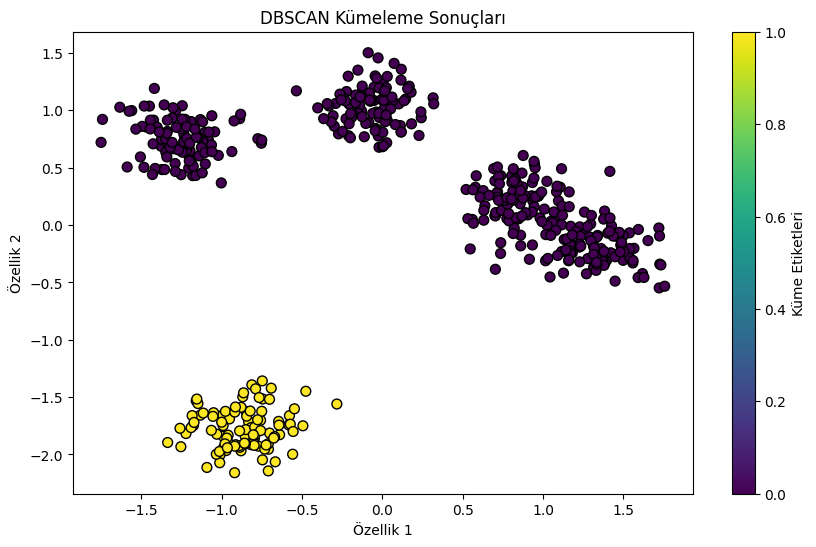

Toplam Küme Sayısı: 2
Silhouette Skoru: 0.5787825172771479


In [35]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# DBSCAN ile uygun eps ve min_samples değerleri ile model oluşturun
dbscan = DBSCAN(eps=1.2865694816789628, min_samples=25)
labels = dbscan.fit_predict(X_scaled)

# Kümeleme sonuçlarını görselleştirin
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('DBSCAN Kümeleme Sonuçları')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.colorbar(label='Küme Etiketleri')
plt.show()

# Küme sayısını kontrol et
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Toplam Küme Sayısı: {n_clusters}")

# Eğer geçerli küme sayısı varsa silhouette skoru hesaplayın
if n_clusters > 1:
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Skoru: {score}")
else:
    print("Silhouette Skoru hesaplamak için en az iki küme gerekli.")